In [1]:
import scipy.ndimage as nd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_2d(array, plot_dims=[5,5],cmap='gray'):
    plt.figure(figsize=plot_dims)
    plt.pcolormesh(array,cmap='gray')

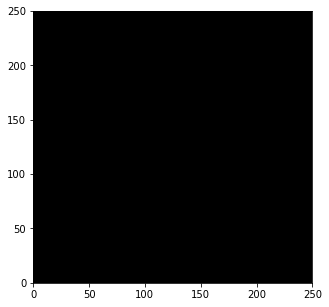

In [3]:
array = np.zeros([250,250])
plot_2d(array)

add point to the centre

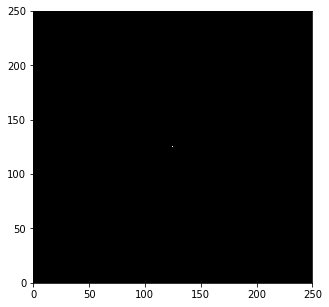

In [4]:
array[125,125] = 1
plot_2d(array)

ndgaussian

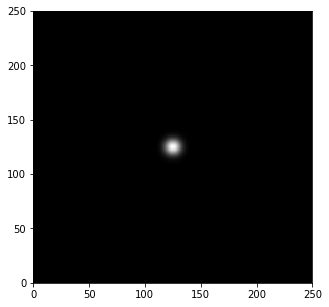

In [5]:
plot_2d(nd.gaussian_filter(array,sigma=5))

we can apply gaussian in 1d to control direciton

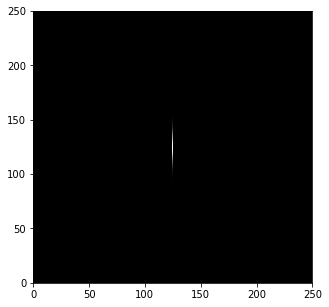

In [6]:
y_blur =nd.gaussian_filter1d(array,sigma=10,axis=0)
plot_2d(y_blur)

and we can blur in 2D now to achieve desired 'ellipsoid' effect

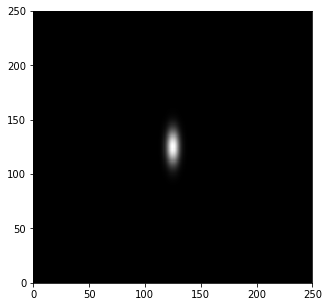

In [7]:
plot_2d(nd.gaussian_filter(y_blur,sigma=4))

now try with two points - blur along line connecting them

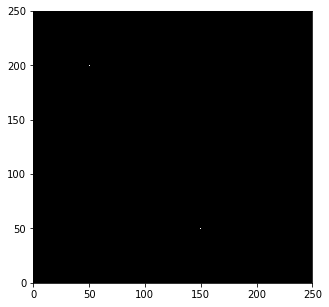

In [8]:
two_points = np.zeros([250,250])

x1 = 50
y1 = 200

x2 = 150
y2 = 50

two_points[y1,x1] = 1
two_points [y2,x2] = 1

plot_2d(two_points)

In [9]:
#get unit vector joining points
direction_vector = np.array([x2-x1,y2-y1])
unit_vector= direction_vector/(np.linalg.norm(direction_vector))
unit_vector

array([ 0.5547002 , -0.83205029])

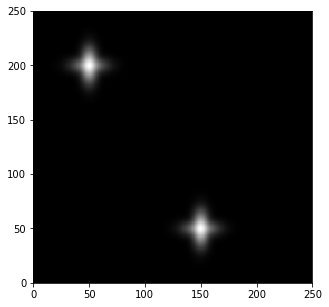

In [29]:
y_blur = nd.gaussian_filter(nd.gaussian_filter1d(two_points,sigma=10,axis=0),sigma=5)
x_blur = nd.gaussian_filter(nd.gaussian_filter1d(two_points,sigma=10,axis=1),sigma=5)

orient = np.sqrt((0.83*y_blur)**2+ (0.55*x_blur)**2)

plot_2d(orient)

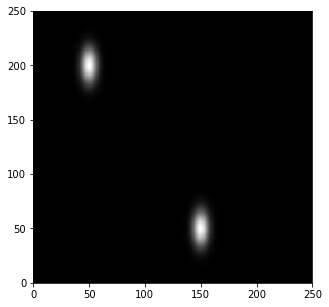

In [31]:
plot_2d(y_blur)

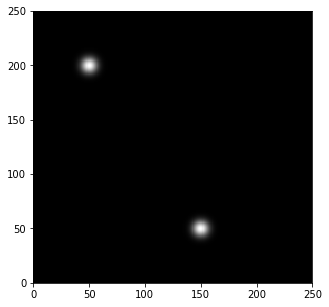

In [34]:
plot_2d(nd.gaussian_filter(two_points,sigma=5))

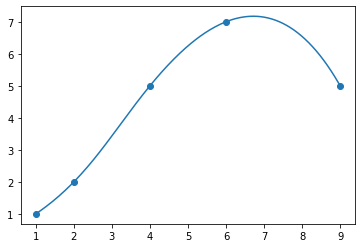

In [42]:
from scipy.interpolate import splprep, splev
pts = np.array([[1,1], [2,2], [4,5], [6,7], [9,5]])
pts = pts.T
tck, u = splprep(pts, u=None, k=3, s=0.0, per=0, quiet = 2)
u_new = np.linspace(u.min(), u.max(), 200)
x_new, y_new = splev(u_new, tck, der=0)
x_new = np.atleast_2d(x_new)
y_new = np.atleast_2d(y_new)
x_new = x_new.flatten()
y_new = y_new.flatten()
plt.plot(x_new, y_new)
plt.scatter(pts[0], pts[1])

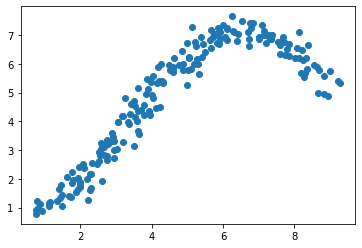

In [43]:
x_scatter, y_scatter = np.random.normal([x_new,y_new], 0.25)
plt.scatter(x_scatter, y_scatter)